In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as pylt
import numpy as np
import pylab as plt
import matplotlib.cm as matcm
import matplotlib.colors as colors
import sys
import os
sys.path.append('/home/cecere/Documentos/python_fomo')
from readfomo import readgoftcube, readgoftcubechianti, regulargoftcube, gaussfitgoftcube
import glob
import sunpy.visualization.colormaps as cm
import sunpy
from astropy.visualization import SqrtStretch, ImageNormalize

In [2]:
# store filenames as a sorted list
#unsorted=glob.glob('../example/example_FLASH/Afomo-hdf5-outputb.txt')
# Para uno
#unsorted=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt')
# Para varios
unsorted1=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/des3/desequilibrio_3-094-t*.txt')
unsorted2=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/des4/desequilibrio_4-094-t*.txt')
unsorted3=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/des5/desequilibrio_5-094-t*.txt')
#print(unsorted)
filelist1=sorted(unsorted1)
filelist2=sorted(unsorted2)
filelist3=sorted(unsorted3)
#print(filelist)

In [3]:
# create data cube from file list
print('Reading file',filelist1[0])
data1,chiantifile=readgoftcubechianti(filelist1[0])
emiss1,xvec,yvec,lvec=regulargoftcube(data1)
data2,chiantifile=readgoftcubechianti(filelist2[0])
emiss2,xvec,yvec,lvec=regulargoftcube(data2)
data3,chiantifile=readgoftcubechianti(filelist3[0])
emiss3,xvec,yvec,lvec=regulargoftcube(data3)
print('xvec',xvec.shape)
print('yvec',yvec.shape)
#print(yvec)
#print('data.shape',data.shape)
#print('data',data)
#print('emiss',emiss)

Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/des3/desequilibrio_3-094-t0000.txt
xvec (350,)
yvec (350,)


Emiss esta escrito asi (yind de arriba a abajo,xind de izquierda a derecha)

In [4]:
print(np.mean(emiss1))

1.2026972081632652


In [5]:
# set colour map
cmap=matcm.hot
aiafilter=os.path.basename(chiantifile)
print(aiafilter)
if ('goft_table_aia094' in aiafilter): cmap=plt.get_cmap('sdoaia94')
if ('goft_table_aia131' in aiafilter): cmap=plt.get_cmap('sdoaia131')
if ('goft_table_aia171' in aiafilter): cmap=plt.get_cmap('sdoaia171')
if ('goft_table_aia193' in aiafilter): cmap=plt.get_cmap('sdoaia193')
if ('goft_table_aia211' in aiafilter): cmap=plt.get_cmap('sdoaia211')
if ('goft_table_aia304' in aiafilter): cmap=plt.get_cmap('sdoaia304')
if ('goft_table_aia335' in aiafilter): cmap=plt.get_cmap('sdoaia335')
#if ('goft_table_aia171' in aiafilter): cmap=plt.get_cmap('hot')
#Estos valores de normalización son los necesarios para que la corona brille hasta una altura similar al filtro correspondiente
if ('goft_table_aia094' in aiafilter): norm=colors.LogNorm(1.5, 50)
if ('goft_table_aia131' in aiafilter): norm=colors.LogNorm(7, 1200)
#if ('goft_table_aia171' in aiafilter): norm=colors.LogNorm(10000, 1000000)#ImageNormalize(vmin=60000, vmax=1000000, stretch=SqrtStretch())
if ('goft_table_aia171' in aiafilter): norm=ImageNormalize(vmin=1, vmax=6000, stretch=SqrtStretch())
if ('goft_table_aia193' in aiafilter): norm=colors.LogNorm(1, 6000)
if ('goft_table_aia211' in aiafilter): norm=colors.LogNorm(1, 13000)
if ('goft_table_aia304' in aiafilter): norm=colors.LogNorm(0.5, 100)
if ('goft_table_aia335' in aiafilter): norm=colors.LogNorm(3.5, 1000)

goft_table_aia094_abco.dat



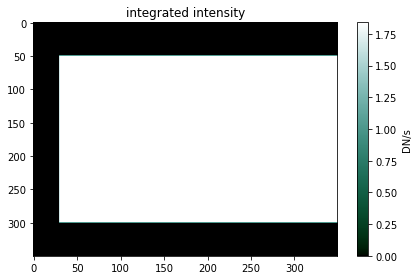

In [6]:
percent_emiss=99
fig, ax = plt.subplots()
im = ax.imshow(emiss3,cmap=cmap,aspect='auto',vmax=np.percentile(emiss3,percent_emiss),vmin=np.amin(emiss3))
plt.title('integrated intensity')
cb=plt.colorbar(im)
cb.set_label('DN/s')

plt.tight_layout()
plt.show()

In [7]:
yind = 150
xind = 20
print(emiss3[yind,xind])

0.0


In [8]:
L0 = 35 #Mm
#print(xvec.size)
#print(xvec)
#print(xvec/np.amax(xvec)*L0)
xvecdim = xvec/np.amax(xvec)*L0
yvecdim = yvec/np.amax(yvec)*L0
#print(xvecdim[0:20])
#print(yvecdim)
xpoint = 2  #in Mm
ypoint = L0 - 20 #in Mm
xind = int(xpoint/L0*xvec.size)
yind = int(ypoint/L0*yvec.size)
print('xind',xind)
print('yind',yind)
print(emiss3[yind,xind])

xind 20
yind 150
0.0


In [9]:
#posición en Mm del punto en "x" y en "y"
newy=L0 - yvecdim[yind:yind+1]
newx=xvecdim[xind:xind+1]
print('newy',newy)
print('newx',newx)

newy [19.9284686]
newx [2.05293278]


In [10]:
newemiss1=emiss1[yind:yind+1,xind:xind+1]
allemiss1=newemiss1
newemiss2=emiss2[yind:yind+1,xind:xind+1]
allemiss2=newemiss2
newemiss3=emiss3[yind:yind+1,xind:xind+1]
allemiss3=newemiss3
#print(allemiss)
print(allemiss1.shape)

(1, 1)


In [11]:
for filename in filelist1[1:]:
    #print('Reading file',filename)
    data1=readgoftcube(filename)
    emiss1,xvec,yvec,lvec=regulargoftcube(data1)
    #tomo un ancho en y para que quede mejor el gráfico
    newemiss1=emiss1[yind:yind+1,xind:xind+1]
    #print(newemiss)
    #construyo una nueva matriz, suma de los cortes en cada tiempo
    allemiss1=np.concatenate((allemiss1,newemiss1), axis=0)
    #print(allemiss.shape)


IndexError: index 39 is out of bounds for axis 0 with size 39

In [ ]:
for filename in filelist2[1:]:
    #print('Reading file',filename)
    data2=readgoftcube(filename)
    emiss2,xvec,yvec,lvec=regulargoftcube(data2)
    #tomo un ancho en y para que quede mejor el gráfico
    newemiss2=emiss2[yind:yind+1,xind:xind+1]
    #print(newemiss)
    #construyo una nueva matriz, suma de los cortes en cada tiempo
    allemiss2=np.concatenate((allemiss2,newemiss2), axis=0)
    #print(allemiss.shape)

In [ ]:
for filename in filelist3[1:]:
    #print('Reading file',filename)
    data3=readgoftcube(filename)
    emiss3,xvec,yvec,lvec=regulargoftcube(data3)
    #tomo un ancho en y para que quede mejor el gráfico
    newemiss3=emiss3[yind:yind+1,xind:xind+1]
    #print(newemiss)
    #construyo una nueva matriz, suma de los cortes en cada tiempo
    allemiss3=np.concatenate((allemiss3,newemiss3), axis=0)
    #print(allemiss.shape)

In [ ]:
print(allemiss1.shape)
print(allemiss2.shape)
print(allemiss3.shape)

In [ ]:
tdim=np.linspace(0.,allemiss1.shape[0]*0.5,num=allemiss1.shape[0])
print(allemiss1.shape[0])
#print(tdim)
print(np.min(tdim),np.max(tdim))

In [ ]:
# set colour map
cmap=matcm.hot
aiafilter=os.path.basename(chiantifile)
if ('goft_table_aia094' in aiafilter): cmap=plt.get_cmap('sdoaia94')
if ('goft_table_aia131' in aiafilter): cmap=plt.get_cmap('sdoaia131')
if ('goft_table_aia171' in aiafilter): cmap=plt.get_cmap('sdoaia171')
if ('goft_table_aia193' in aiafilter): cmap=plt.get_cmap('sdoaia193')
if ('goft_table_aia211' in aiafilter): cmap=plt.get_cmap('sdoaia211')
if ('goft_table_aia304' in aiafilter): cmap=plt.get_cmap('sdoaia304')
if ('goft_table_aia335' in aiafilter): cmap=plt.get_cmap('sdoaia335')
#Estos valores de normalización son los necesarios para que la corona brille hasta una altura similar al filtro correspondiente
if ('goft_table_aia094' in aiafilter): norm=colors.LogNorm(1.5, 50)
if ('goft_table_aia131' in aiafilter): norm=colors.LogNorm(7, 1200)
if ('goft_table_aia171' in aiafilter): norm=ImageNormalize(vmin=60000, vmax=1000000, stretch=SqrtStretch())
#if ('goft_table_aia171' in aiafilter): norm=ImageNormalize(vmin=10, vmax=6000, stretch=SqrtStretch())
if ('goft_table_aia193' in aiafilter): norm=colors.LogNorm(1, 6000)
if ('goft_table_aia211' in aiafilter): norm=colors.LogNorm(1, 13000)
if ('goft_table_aia304' in aiafilter): norm=colors.LogNorm(1, 600)
if ('goft_table_aia335' in aiafilter): norm=colors.LogNorm(3.5, 1000)

In [ ]:
print(np.max(allemiss1),np.max(allemiss2),np.max(allemiss3))

In [ ]:
pltemiss1, = plt.plot(tdim[0:999],allemiss1[0:999],label='Des3')
pltemiss2, = plt.plot(tdim[0:999],allemiss2[0:999],label='Des4')
pltemiss3, = plt.plot(tdim[0:999],allemiss3[0:999],label='Des5')
plt.legend(handles=[pltemiss1,pltemiss2,pltemiss3])
#plt.legend(handles=[pdens])
#plt.legend(handles=[pdens,pmagy])
plt.tick_params( labelsize=17)
plt.xlim(np.min(tdim),np.max(tdim))
#plt.ylim(emin, emax)
plt.title('Emission evolution',fontsize=17)
plt.ylabel( '94',fontsize=17)
plt.xlabel('t [s]',fontsize=17)
#plt.yscale('log')
#plt.savefig(path+simulacion +'/'+pos+'_energia.pdf', bbox_inches='tight')
